## Exploratory Data Analysis
***

**EDA** is a technique primarily used to see what data can reveal the hidden story and provides a better understanding of dataset variables and the relationships between them.

Some techniques and statistical functions thata can be perform with EDA tools include:

   - Clustering and dimension reduction techniques, which help create graphical 
      displays of high-dimensional data containing many variables.
      
   - Univariate visualization of each field in the raw dataset, with summary statistics.
    
   - Bivariate visualizations and summary statistics that allow you to assess 
      the relationship between each variable in the dataset and the target variable you’re looking at.
    
   - Multivariate visualizations, for mapping and understanding interactions between different fields in the data.

***
***
In this notebook, I tried to cover all the EDA steps to approach any new dataset with logial explenation.


I used four dataset: <br>
<ol>
<li>   Titanic dataset (taken from kaggle)</li>
<li>   Iris dataset (inbulit dataset from seaborn library)</li>
<li>   Flights dataset (inbulit dataset from seaborn library)</li>
<li>   Tips dataset (inbulit dataset from seaborn library)</li>
</ol>

***
***

In [4]:
import pandas as pd

# linear Algebra
import numpy as np

# visualization library
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("Titano.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
291,1183,1,3,"Daly, Miss. Margaret Marcella Maggie""""",female,30.0,0,0,382650,6.9500,NaN,Q
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
323,1215,0,1,"Rowe, Mr. Alfred G",male,33.0,0,0,113790,26.5500,NaN,S
247,1139,0,2,"Drew, Mr. James Vivian",male,42.0,1,1,28220,32.5000,NaN,S
270,1162,0,1,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,13050,75.2417,C6,C


In [5]:
df.shape

(418, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
## there are 86 missing values in Age 
(327/418)*100
## and 78 % missing values of cabin 
## 1 missing value of fare

78.22966507177034

In [9]:
df.describe()  ## hear we get insights on numerical columns only 


## if i want every value to be rounded to 2 digit then 

np.round(df.describe(), 2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.00,418.00,332.00,418.00,418.00,417.00
mean,1100.50,0.36,2.27,30.27,0.45,0.39,35.63
std,120.81,0.48,0.84,14.18,0.90,0.98,55.91
min,892.00,0.00,1.00,0.17,0.00,0.00,0.00
25%,996.25,0.00,1.00,21.00,0.00,0.00,7.90
50%,1100.50,0.00,3.00,27.00,0.00,0.00,14.45
75%,1204.75,1.00,3.00,39.00,1.00,0.00,31.50
max,1309.00,1.00,3.00,76.00,8.00,9.00,512.33


In [10]:
np.round(df.describe()['Pclass'], 2)

count    418.00
mean       2.27
std        0.84
min        1.00
25%        1.00
50%        3.00
75%        3.00
max        3.00
Name: Pclass, dtype: float64

In [11]:
## cheaking if any duplicate values
df.duplicated().sum()

## no duplicated values

0

In [12]:
## cheaking the correlation of columns 
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


In [68]:
# df.corr()['Survived']

## if i want in terms of percentage then 
np.round(df.corr()['Survived']*100, 2)

PassengerId     -2.32
Survived       100.00
Pclass         -10.86
Age             -0.00
SibSp            9.99
Parch           15.91
Fare            19.15
Name: Survived, dtype: float64

In [14]:
## from this we can clearly see that survived has strong corrleation with fare of 19 %
## that means if fare is high chance of survive is also high 

## Similarly with the Parch 

## Also Survived has strong inverse corrleation with Pclass  -- 10 % relation 
## that means lower the Pclass value the chance of survival is more 

In [69]:
# df.corr()["Age"]

# in terms of percentage 

np.round(df.corr()["Age"]*100, 2)

PassengerId     -3.41
Survived        -0.00
Pclass         -49.21
Age            100.00
SibSp           -9.16
Parch           -6.12
Fare            33.79
Name: Age, dtype: float64

In [16]:
## hear Age and Fare is highly corrleated   almost 33 %
## that means if age is increasing the fare is also increasing


## also if age is Increasing then Pclass is decreasing
## i.e class 1 will be having older people 


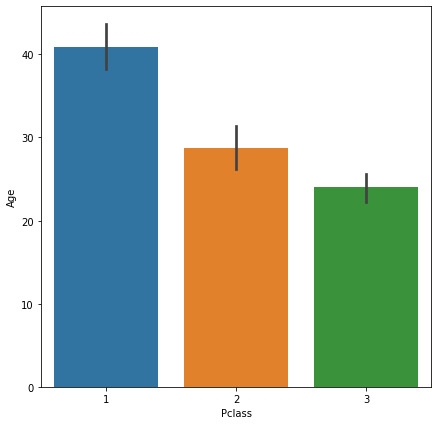

In [75]:
## we will cross verify this by plotting the graph between Pclass and Age
plt.figure(figsize=(7,7))
sns.barplot(df['Pclass'], df['Age'])
plt.show()

***
## EDA -- Univarient Analysis 
#### ( Analysis of singel column )
***

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
df.Parch.value_counts()

0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64

In [19]:
df["SibSp"].value_counts()

0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64

In [20]:
df["Cabin"].value_counts()

B57 B59 B63 B66    3
C89                2
E34                2
F4                 2
C6                 2
                  ..
D38                1
E46                1
D34                1
D37                1
F2                 1
Name: Cabin, Length: 76, dtype: int64

In [21]:
## Categorical columns : Survived, Pclass, SibSp, Parch, Cabin

## Numerical columns : Age, Fare, Ticket

### Working with categorical Data

####  countplot ( gives the frequency of category data ) and piechart ( gives the % of category data ) 

In [ ]:
# Categorical data can be visualized using only a  bar chart and pie chart. 
# The bar chart is used when measuring for frequency (or mode) while 
# The pie chart is used when dealing with percentages.

In [22]:
### using numpy on Survived Columns We can check how many rows lie in particular category 

df["Survived"].value_counts()


0    266
1    152
Name: Survived, dtype: int64

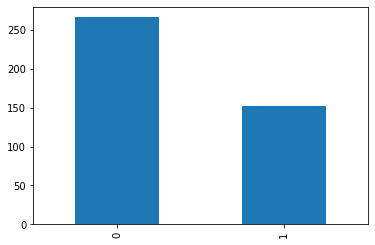

In [23]:
df["Survived"].value_counts().plot(kind = "bar")

# from this we can say that dide people are more than survived people 

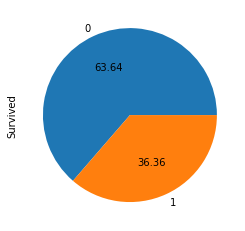

In [24]:
## interms of % we can see the category 

df['Survived'].value_counts().plot(kind='pie',autopct='%.2f')

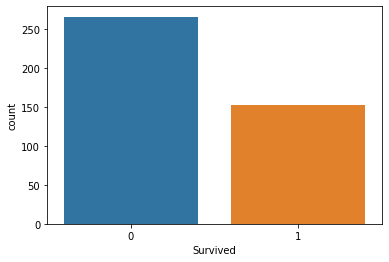

In [76]:
## we can plot them using seaborn 

sns.countplot(df['Survived'])
plt.show()

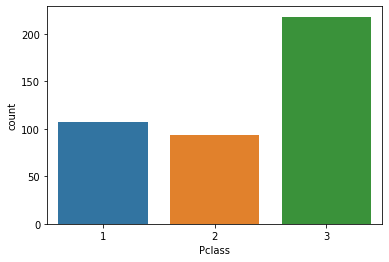

In [26]:
sns.countplot(df["Pclass"])

## from this we can clearly see that 3rd class people are highest 

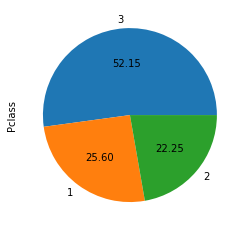

In [27]:
df['Pclass'].value_counts().plot(kind = "pie", autopct = "%.2f")

# info in terms of precentage

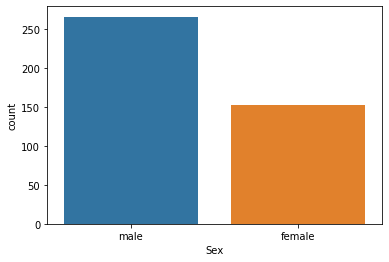

In [28]:
sns.countplot(df["Sex"])

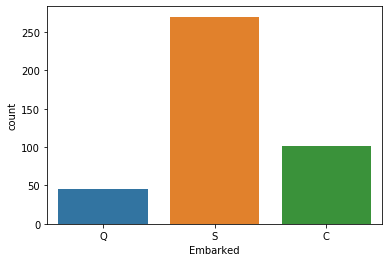

In [29]:
sns.countplot(df["Embarked"])

In [30]:
## in categorical data 

## we can olny find out the frequency of the count
## also in term of % using pie chart 

### Working with Numerical Data

### a. Histogram 

In [31]:
## In numerical data we try to divide our data into range 
## like in Age we try to divide in range of 0-10, 10-20, 20-30 .....  we call range as bins

# that means we are looking the distribution of the data into numerical col (if we have numerical data and continious data)

C:\Users\shivam\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\shivam\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


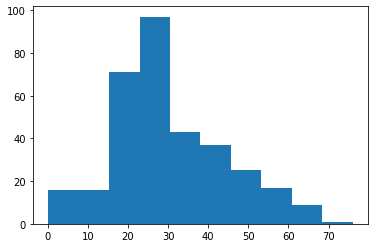

In [32]:
## from making histogram we use matplotlib.pyplot 
plt.hist(df["Age"])
plt.show()


## this is showing that small age people and  high age people are less as compare to 
## middle age people..   age betweeen [20, 30] are highest 

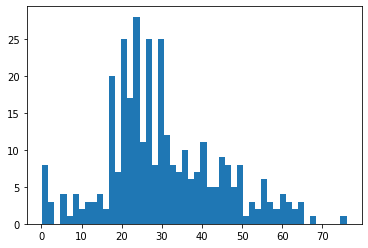

In [33]:
## we can change the bins in histogram
plt.hist(df["Age"], bins = 50)
plt.show()

### b. Distplot

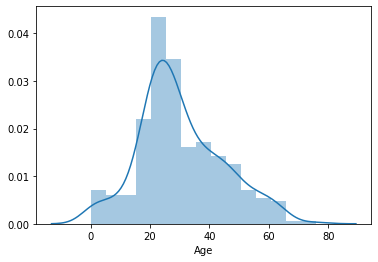

In [34]:
## Displot is same as histogram just added kde
## kde = Kernal density destribution 


## kde == Pdf (probablity density function )
## that means if i take random person of x age then it will give me the probablity of finding that person

sns.distplot(df["Age"])

## dis plot also tells the skewness of data

## skewness can also be find out by 
## df["Age"].skew()   ... if it is 1 then data is equally distributed

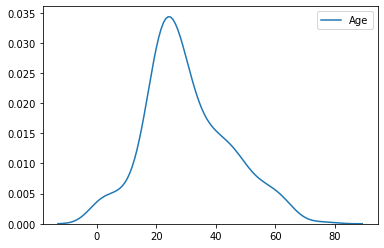

In [35]:
sns.kdeplot(df["Age"]) 
## or
## sns.distplot(df["Age"], hist =False)

In [36]:
df["Age"].skew()

0.4573612871503845

### c. Boxplot

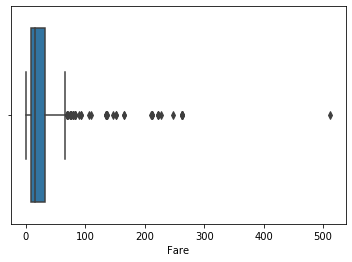

In [37]:
## It gives the 5 No summery 

## median == if we sort our date then the middle element is median 
## Q1 = this is that form data, below which 25 % of data is small   i.e. 25 percentile 
## Q3 = 75 percentile 
## minimum 
## maximum 


sns.boxplot(df["Fare"])


## from this we can clearly see that 500 fare is potential outlier

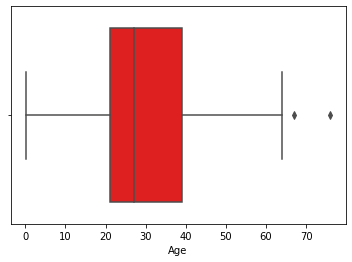

In [38]:
## Box plot of Age column 

sns.boxplot(df["Age"], color = "red")

## there are two potential outlyer

In [39]:
df["Age"].min()

0.17

In [40]:
df["Age"].max()

76.0

In [41]:
df["Age"].mean()

30.272590361445783

In [42]:
df["Age"].median()

27.0

## EDA - Bivarient Analysis / Multi-Varient Analysis
#### ( Bivarient =  Analysis of  two columns )
#### ( Multivariet = Alalysis of more than 2 columns )

In [43]:
## we will be using 4 different datasets 

In [44]:
titanic = pd.read_csv("tested.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
tips = sns.load_dataset("tips")    # this is dataset 0f hotel bill and tips given to waiter 
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [46]:
iris = sns.load_dataset('iris')    # this is dataset of flowers and their species
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
flight = sns.load_dataset("flights")
flight.head()


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## 1] Scatter Plot - Numerical to Numerical 

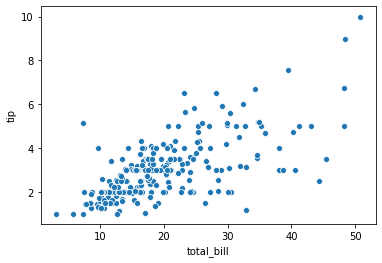

In [48]:
## we will be using tips dataset 
## it has 2 numerical columns total_bill and tip

sns.scatterplot(tips["total_bill"], tips["tip"])

## from this we can claearly see that 
## tip is increasing as total_bill is increasing
## linear relation 

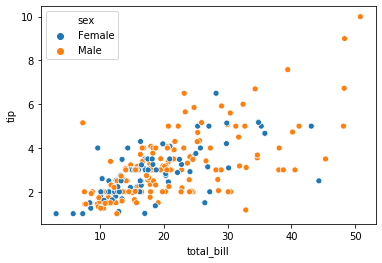

In [49]:
## sns has power to again add another feature 

sns.scatterplot(tips["total_bill"], tips["tip"], hue = tips["sex"])

## many outliers are male 

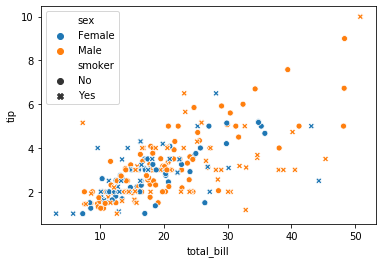

In [50]:
## with smoker feature 

sns.scatterplot(tips["total_bill"], tips["tip"], hue = tips["sex"], style = tips["smoker"])

## this shows are most of the outlyer are male smokers

## 2] Bar Plot - Numerical to Categorical

In [51]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


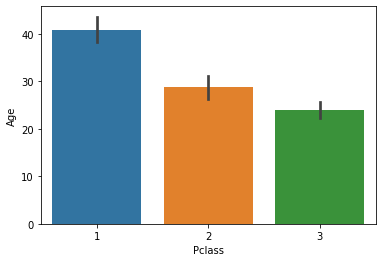

In [52]:
## hear we will plot "Avg Age" and "Pclass" Category 

sns.barplot(titanic["Pclass"], titanic["Age"])    ## we will x_axis as category and y_axis as an average Age
## Black rod is confidence interval 

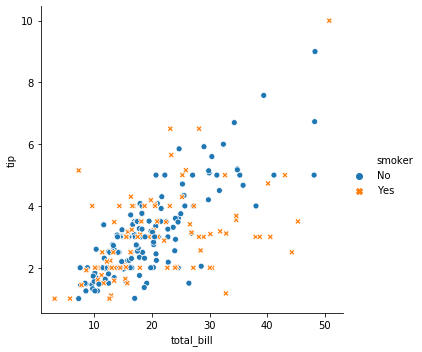

In [53]:
sns.relplot(x = "total_bill", y = "tip", hue = "smoker", data = tips, style = "smoker")

In [54]:
dots = sns.load_dataset("dots")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


In [55]:
dots.sample(10)

,align,choice,time,coherence,firing_rate
777,sacc,T2,80,3.2,27.089783
688,sacc,T2,-220,3.2,37.069509
571,sacc,T1,160,3.2,20.312500
824,sacc,T2,240,0.0,28.675048
41,dots,T1,40,51.2,36.279297
425,sacc,T1,-380,6.4,48.847411
65,dots,T1,120,51.2,33.349609
73,dots,T1,160,3.2,33.019118
38,dots,T1,40,6.4,36.797066
378,dots,T2,600,3.2,38.985971


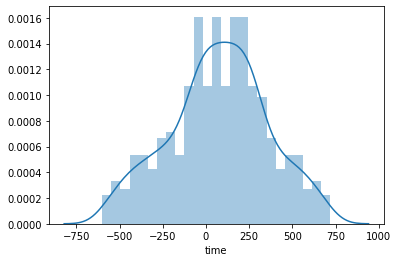

In [56]:
sns.distplot(dots["time"], bins = 25)

In [57]:
print( dots["time"].min() )
print( dots["time"].max() )

-600
720


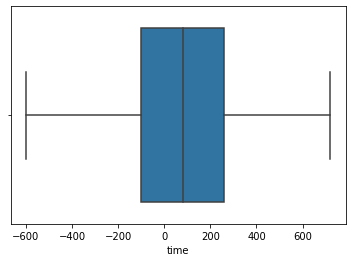

In [58]:
sns.boxplot(dots["time"])

In [59]:
dots["choice"].value_counts()

T2    430
T1    418
Name: choice, dtype: int64

In [60]:
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


In [61]:
dots.coherence.value_counts()

0.0     174
3.2     170
6.4     156
12.8    142
25.6    116
51.2     90
Name: coherence, dtype: int64

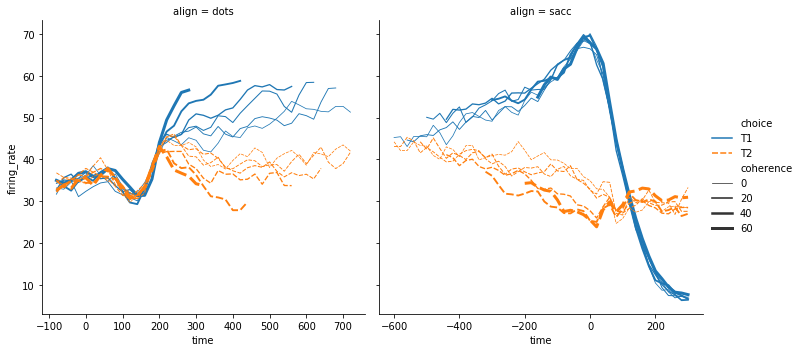

In [62]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

In [63]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [64]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [65]:
# tips.head()

tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

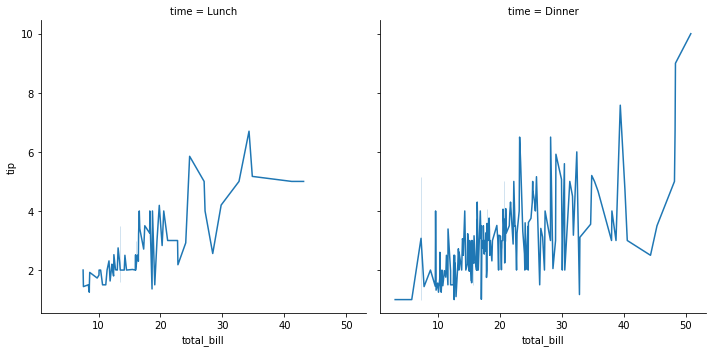

In [67]:
sns.relplot(x ="total_bill", y = "tip", col="time", data = tips, kind = "line")

In [ ]:
The confusion matrix is used to tell you how many predictions were classified correctly or incorrectly. 
You are looking at a regression model, which gives you a continous output (not classification).

So when you run confusion_matrix(y_test, y_pred) it will throw the ValueError because it expected
class predictions, not floating point numbers.

Are you trying to predict classes, or really just a number output? 
If not, then you should not be using the confusion matrix.